In [3]:
import os
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets

import sys

sys.path.insert(0, "build")
import _autoneuronet as ann

# import autoneuronet as ann

# MNIST Classification


In [7]:
train_dataset = datasets.MNIST("./data", train=True, download=True)
test_dataset = datasets.MNIST("./data", train=False)

batch_size = 16

In [8]:
train_images = train_dataset.data.numpy()
train_images = train_images.reshape(train_images.shape[0], -1)
train_images = train_images / 255.0

train_labels = train_dataset.targets.numpy()

test_images = test_dataset.data.numpy()
test_images = test_images.reshape(test_images.shape[0], -1)
test_images = test_images / 255.0

test_labels = test_dataset.targets.numpy()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 784), (60000,), (10000, 784), (10000,))

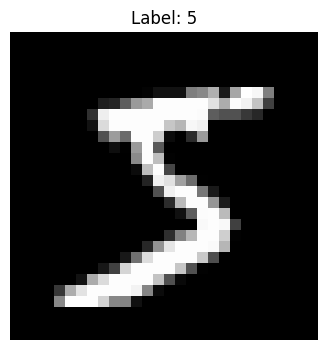

In [9]:
plt.figure(figsize=(4, 4))
plt.imshow(train_images[0].reshape(28, 28), cmap="gray")
plt.title(f"Label: {train_labels[0]}")
plt.axis(False)
plt.show()

In [10]:
def numpy_to_matrix(array: any, *, as_column: bool = False) -> ann.Matrix:
    """Convert a numpy array or sequence to a Matrix."""
    import numpy as np

    numpy_array = np.asarray(array, dtype=float)
    if numpy_array.ndim == 0:
        numpy_array = numpy_array.reshape(1, 1)
    elif numpy_array.ndim == 1:
        numpy_array = (
            numpy_array.reshape((-1, 1)) if as_column else numpy_array.reshape((1, -1))
        )
    elif numpy_array.ndim != 2:
        raise ValueError("Expected a 1D or 2D array")

    rows, cols = numpy_array.shape
    matrix = ann.Matrix(int(rows), int(cols))
    for i in range(rows):
        matrix[i] = numpy_array[i].tolist()

    return matrix

In [11]:
def batch_generator(numpy_array: np.ndarray, batch_size: int = 16):
    num_samples = numpy_array.shape[0]
    for i in range(0, num_samples, batch_size):
        yield numpy_array[i : i + batch_size]

In [18]:
train_images_matrices = []
train_labels_matrices = []

test_images_matrices = []
test_labels_matrices = []

for batch in batch_generator(train_images, batch_size):
    batch_matrix = numpy_to_matrix(batch)
    train_images_matrices.append(batch_matrix)

for batch in batch_generator(train_labels, batch_size):
    batch_matrix = numpy_to_matrix(batch)
    train_labels_matrices.append(batch_matrix)

for batch in batch_generator(test_images, batch_size):
    batch_matrix = numpy_to_matrix(batch)
    test_images_matrices.append(batch_matrix)

for batch in batch_generator(test_labels, batch_size):
    batch_matrix = numpy_to_matrix(batch)
    test_labels_matrices.append(batch_matrix)

In [19]:
lr = 1e-2
momentum = 0.9
weight_decay = 1e-4

epochs = 15

model = ann.NeuralNetwork(
    [
        ann.Linear(784, 128, init="he"),
        ann.ReLU(),
        ann.Linear(128, 10, init="he"),
        # ann.Softmax(),
    ]
)
optimizer = ann.SGDOptimizer(
    learning_rate=lr, model=model, momentum=momentum, weight_decay=weight_decay
)

model

NeuralNetwork =
Linear(784, 128)
ReLU()
Linear(128, 10)

In [ ]:
# Training Loop
# Epoch: 15 | Train Loss: 0.011569604350680584

for epoch in tqdm(range(epochs), desc="Training the MNIST Neural Network"):
    train_loss = 0.0
    num_train_batches = 0

    training_pbar = tqdm(
        zip(train_images_matrices, train_labels_matrices),
        total=min(
            len(train_images_matrices),
            len(train_labels_matrices),
        ),
        desc=f"Training MNIST Neural Network {epoch + 1}",
    )

    for batched_images_matrix, batched_labels_matrix in training_pbar:
        optimizer.resetGrad()

        # Forward pass
        y_pred = model.forward(batched_images_matrix)

        # Calculate the loss
        loss = ann.CrossEntropyLossWithLogits(batched_labels_matrix, y_pred)

        loss_val = loss.getVal()
        train_loss += loss_val

        training_pbar.set_postfix(
            loss=f"{loss_val:.8f}",
        )

        # Backpropagation
        loss.setGrad(1.0)
        loss.backward()
        optimizer.optimize()

        num_train_batches += 1

    print(f"Epoch: {epoch + 1} | Train Loss: {train_loss / num_train_batches}")

    os.makedirs("models/mnist", exist_ok=True)
    model.saveWeights(f"models/mnist/mnist_model_epoch_{epoch + 1}.bin")

Training the MNIST Neural Network:   7%|▋         | 1/15 [30:36<7:08:27, 1836.26s/it]

Epoch: 1 | Train Loss: 0.24758720103009366


Training the MNIST Neural Network:  13%|█▎        | 2/15 [59:39<6:25:59, 1781.51s/it]

Epoch: 2 | Train Loss: 0.11448748878427129


Training the MNIST Neural Network:  20%|██        | 3/15 [1:30:42<6:03:46, 1818.84s/it]

Epoch: 3 | Train Loss: 0.0822210579487786


Training the MNIST Neural Network:  27%|██▋       | 4/15 [2:07:59<6:03:41, 1983.79s/it]

Epoch: 4 | Train Loss: 0.06313852159819358


Training the MNIST Neural Network:  33%|███▎      | 5/15 [2:39:10<5:23:50, 1943.07s/it]

Epoch: 5 | Train Loss: 0.05054140903126979


Training the MNIST Neural Network:  40%|████      | 6/15 [3:10:12<4:47:19, 1915.55s/it]

Epoch: 6 | Train Loss: 0.0409247077815438


Training the MNIST Neural Network:  47%|████▋     | 7/15 [3:40:47<4:11:54, 1889.37s/it]

Epoch: 7 | Train Loss: 0.03378042129214475


Training the MNIST Neural Network:  53%|█████▎    | 8/15 [4:11:16<3:38:10, 1870.04s/it]

Epoch: 8 | Train Loss: 0.0282121594544419


Training the MNIST Neural Network:  60%|██████    | 9/15 [4:41:48<3:05:48, 1858.11s/it]

Epoch: 9 | Train Loss: 0.023781547032366658


Training the MNIST Neural Network:  67%|██████▋   | 10/15 [5:12:19<2:34:08, 1849.65s/it]

Epoch: 10 | Train Loss: 0.020243771656658943


Training the MNIST Neural Network:  73%|███████▎  | 11/15 [5:42:55<2:03:02, 1845.69s/it]

Epoch: 11 | Train Loss: 0.017539408936651752


Training the MNIST Neural Network:  80%|████████  | 12/15 [6:13:43<1:32:18, 1846.28s/it]

Epoch: 12 | Train Loss: 0.015452639380010381


Training the MNIST Neural Network:  87%|████████▋ | 13/15 [6:44:38<1:01:37, 1848.91s/it]

Epoch: 13 | Train Loss: 0.013885466166200818


Training the MNIST Neural Network:  93%|█████████▎| 14/15 [7:15:32<30:50, 1850.44s/it]  

Epoch: 14 | Train Loss: 0.012590432237508263


Training the MNIST Neural Network: 100%|██████████| 15/15 [7:46:30<00:00, 1866.00s/it]

Epoch: 15 | Train Loss: 0.011569604350680584


In [ ]:
# Testing Loop
# Test Loss: 0.07210141299932878
# Test Accuracy: 97.80%

test_loss_sum = 0.0
num_test_batches = 0

test_acc_correct = 0
test_acc_total = 0

testing_pbar = tqdm(
    zip(test_images_matrices, test_labels_matrices),
    total=min(
        len(test_images_matrices),
        len(test_labels_matrices),
    ),
    desc=f"Testing MNIST Neural Network",
)

for batched_images_matrix, batched_labels_matrix in testing_pbar:
    # Forward pass
    y_pred = model.forward(batched_images_matrix)

    # Calculate the loss
    loss = ann.CrossEntropyLossWithLogits(batched_labels_matrix, y_pred)

    test_loss_val = loss.getVal()
    test_loss_sum += test_loss_val

    for i in range(y_pred.rows):
        best_pred = 0
        best_val = y_pred[i, 0].getVal()
        for j in range(1, y_pred.cols):
            val = y_pred[i, j].getVal()

            if val > best_val:
                best_val = val
                best_pred = j

        label = int(batched_labels_matrix[i, 0].getVal())
        if best_pred == label:
            test_acc_correct += 1

        test_acc_total += 1

    testing_pbar.set_postfix(
        loss=f"{test_loss_val:.8f}",
        acc=f"{(test_acc_correct / test_acc_total) * 100:.2f}%",
    )

    num_test_batches += 1

print(f"Test Loss: {test_loss_sum / num_test_batches}")
print(f"Test Accuracy: {(test_acc_correct / test_acc_total) * 100:.2f}%")

Testing MNIST Neural Network 15: 100%|██████████| 625/625 [04:16<00:00,  2.43it/s, acc=97.80%, loss=0.00012911]

Test Loss: 0.07210141299932878
Test Accuracy: 97.80%


In [23]:
def predict(model: ann.NeuralNetwork, image: np.ndarray, label: int):
    image_matrix = numpy_to_matrix(image.reshape(1, -1))
    logits = model.forward(image_matrix)

    logits_numpy = np.array([logits[0, i].getVal() for i in range(logits.cols)])
    exps = np.exp(logits_numpy - logits_numpy.max())
    probs = exps / exps.sum()

    pred = int(np.argmax(probs))

    plt.figure(figsize=(4, 4))
    plt.imshow(image.reshape(28, 28), cmap="gray")
    title = f"True Label: {label} | Pred Label: {pred}"
    plt.title(title)
    plt.axis(False)
    plt.show()

    return pred, probs

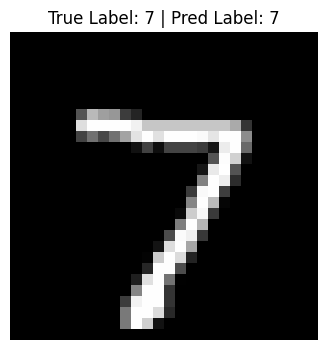

Probs:
0: 0.0000%
1: 0.0000%
2: 0.0000%
3: 0.0084%
4: 0.0000%
5: 0.0000%
6: 0.0000%
7: 99.9911%
8: 0.0000%
9: 0.0005%


In [24]:
idx = 0
pred, probs = predict(model, test_images[idx], test_labels[idx])

print("Probs:")
for i, prob in enumerate(probs):
    print(f"{i}: {prob * 100:.4f}%")

In [22]:
model.loadWeights("models/mnist/mnist_model_epoch_15.bin")